In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
# directory list
main_path = './dataset/train/'

In [53]:
#Training
train = tf.keras.utils.image_dataset_from_directory(main_path,
                                                            batch_size=32,
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(main_path,
                                                            batch_size=32,
                                                            validation_split = 0.2,
                                                            subset = 'validation',
                                                            seed = 1,
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

Found 1522 files belonging to 8 classes.
Found 1522 files belonging to 8 classes.
Using 304 files for validation.


In [54]:
# class names
class_names = train.class_names
class_names

['kue_dadar_gulung',
 'kue_kastengel',
 'kue_klepon',
 'kue_lapis',
 'kue_lumpur',
 'kue_putri_salju',
 'kue_risoles',
 'kue_serabi']

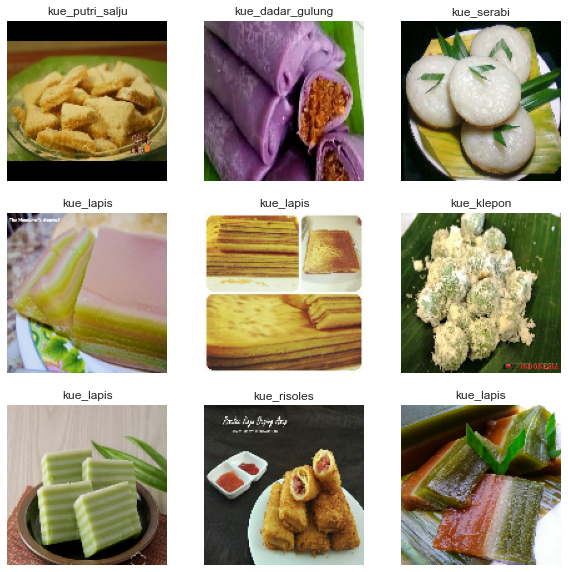

In [55]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [56]:
trainTemp = train.unbatch()
labels = []
for x, y in trainTemp:
    index = np.argmax(y)
    labels.append(class_names[index])

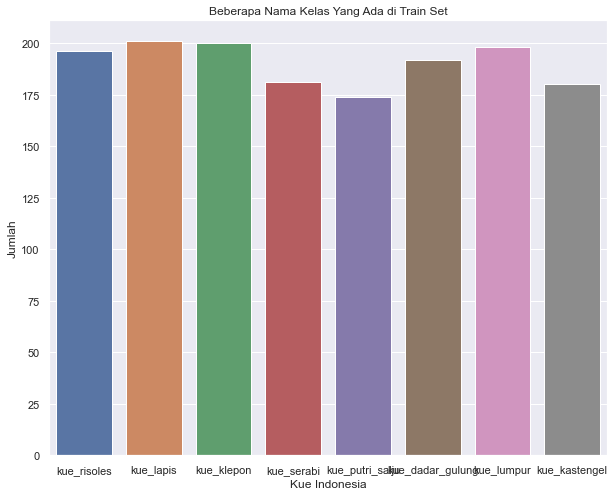

In [57]:
plt.figure(figsize=(10, 8))

sns.set_theme()


sns.countplot(x=labels)
plt.xlabel('Kue Indonesia')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Train Set')
plt.show()

In [58]:
#Normalisasi
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

#Grayscale
def rgb2gray(image, label):
  return tf.image.rgb_to_grayscale(image), label

In [59]:
train = train.map(normalize_img)
validation = validation.map(normalize_img)

In [65]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.4),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.3),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.6),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8, activation='softmax')
])

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 30, 30, 32)       

In [67]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [68]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)

In [69]:
hasil = model.fit(train, epochs=30,validation_data=validation,verbose=1,callbacks=[earlyStopping])

Epoch 1/30
48/48 [==============================] - 63s 1s/step - loss: 2.1079 - accuracy: 0.1222 - val_loss: 2.0791 - val_accuracy: 0.1382
Epoch 2/30
 4/48 [=>............................] - ETA: 49s - loss: 2.0737 - accuracy: 0.1328

KeyboardInterrupt: 

In [ ]:
test_evaluate = model.evaluate(test, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 1.4939236640930176
Test accuracy : 0.5617284178733826


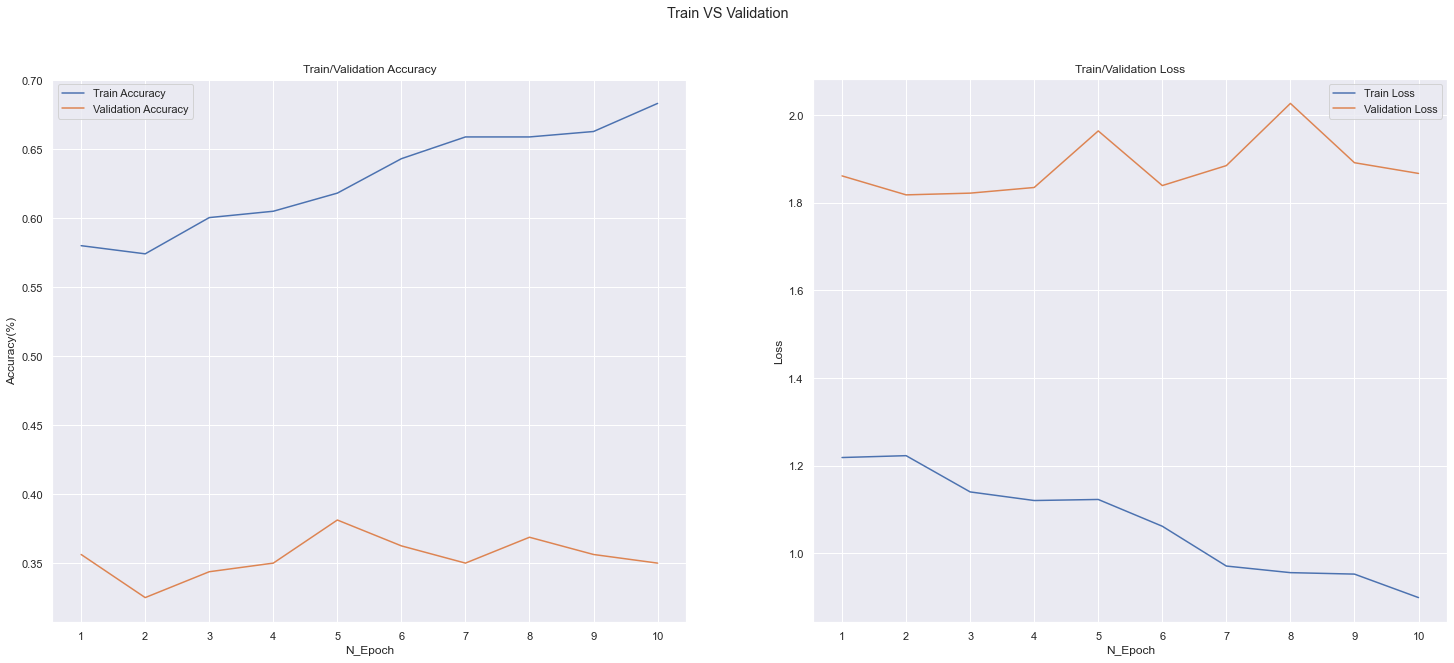

In [27]:
epoch = [i+1 for i in range(10)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

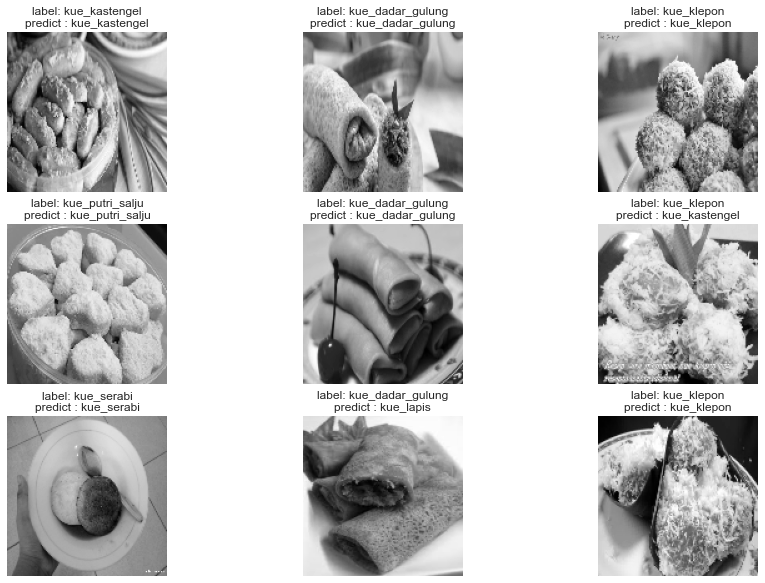

In [18]:
image ,label = next(iter(test))


plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]),cmap='gray')
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

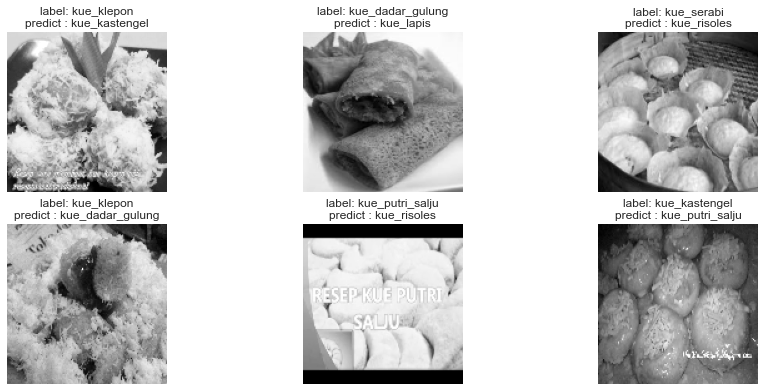

In [21]:
#Plot prediction Error
plt.figure(figsize=(15,10))

i = 0
j = 0
while (j < 6):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))

    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]),cmap='gray')
        plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')
        j+=1
    i+=1

In [22]:
test_pred = model.predict(test)
test_pred_labes = np.argmax(test_pred,axis = 1)
test_labels1 = np.concatenate([y for x, y in test], axis=0)
test_labels = [np.argmax(y) for y in test_labels1]

6/6 [==============================] - 2s 206ms/step


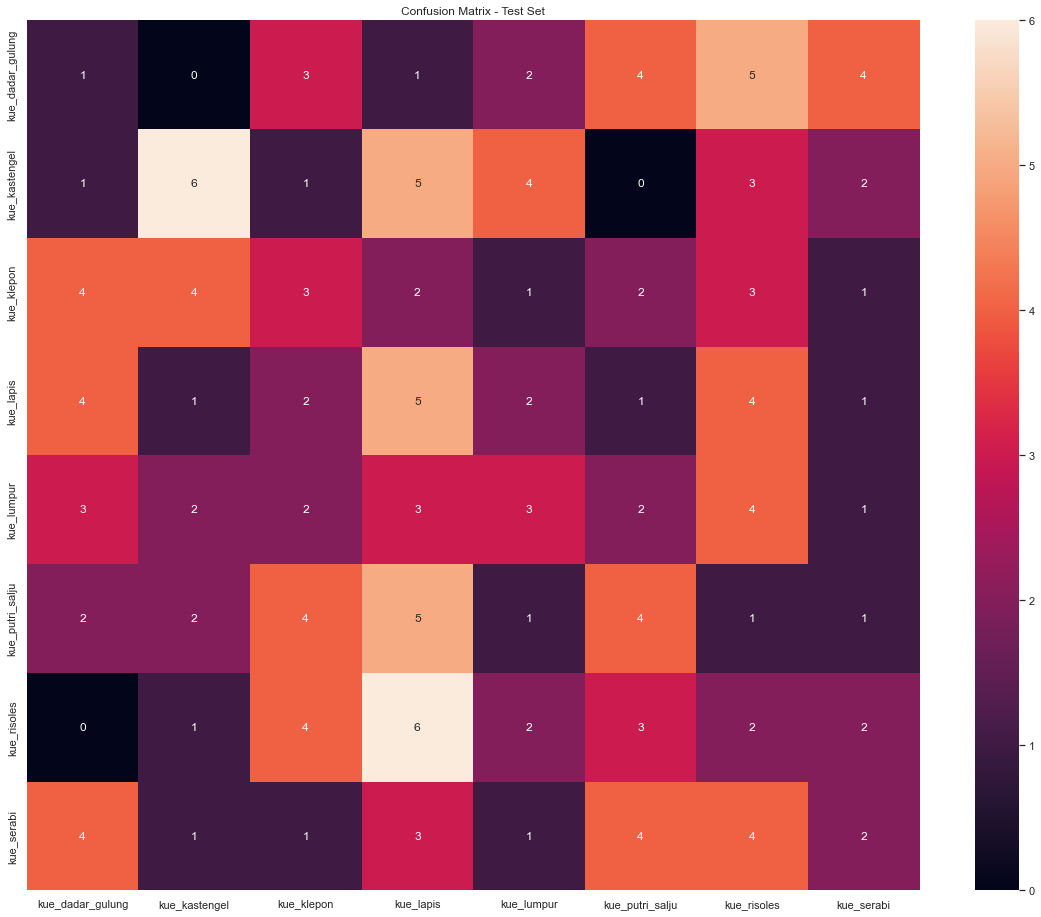

In [23]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_labels,test_pred_labes)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [24]:
#Classification Report
print('Classification Report')
print(classification_report(test_pred_labes, test_labels, target_names=class_names))

Classification Report
                  precision    recall  f1-score   support

kue_dadar_gulung       0.05      0.05      0.05        19
   kue_kastengel       0.27      0.35      0.31        17
      kue_klepon       0.15      0.15      0.15        20
       kue_lapis       0.25      0.17      0.20        30
      kue_lumpur       0.15      0.19      0.17        16
 kue_putri_salju       0.20      0.20      0.20        20
     kue_risoles       0.10      0.08      0.09        26
      kue_serabi       0.10      0.14      0.12        14

        accuracy                           0.16       162
       macro avg       0.16      0.17      0.16       162
    weighted avg       0.16      0.16      0.16       162

